In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sber_data = pd.read_csv('data/sber_data.csv')
sber_data['price_doc'].max()

#fig = plt.figure(figsize=(20, 10))             # График для анализа данных
#axes=fig.add_axes([0, 0, 1, 1])
#axes.scatter(
#    x=sber_data['kremlin_km'],
#    y=sber_data['price_doc'],
#    label='Price/distance',
#)
#axes.set_ylabel('Цена')
#axes.set_xlabel('Удаленность');


cols_null_percent = sber_data.isnull().mean() * 100                                     # получим долю пустых значений в столбцах
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)    # отсортируем
#display(cols_with_null)  

'''
cols_with_null.plot(                                                # Быстрый и простой способ построить график, для визуальной оценки значений
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))                                   # На тепловой диаграмме можно оценить места концентрации пустых значений
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)
'''

####################

'''         Dropna() - метод очистки пустых данных            '''
'''
    axis — ось, по которой производится удаление (по умолчанию 0 — строки).
    how — как производится удаление строк (any — если хотя бы в одном из столбцов есть пропуск, стоит по умолчанию; 
                                            all — если во всех столбцах есть пропуски). 
    thresh — порог удаления. Определяет минимальное число непустых значений в строке/столбце, при котором она/он сохраняется. 
                            Например, если мы установим thresh в значение 2, то мы удалим строки, где число пропусков больше 
                            чем "n-2" и более, где "n" — число признаков (если axis=0).'''
                            
#создаем копию исходной таблицы
drop_data = sber_data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()
#print(drop_data.shape)              # Было удалено около 30% все записей. Много ли это?




'''         Fillna() - метод заполнения пропусков          '''
#cols = cols_with_null.index
#sber_data[cols].hist(figsize=(20, 8));


#создаем копию исходной таблицы
fill_data = sber_data.copy()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {
    'life_sq': fill_data['full_sq'],
    'metro_min_walk': fill_data['metro_min_walk'].median(),
    'metro_km_walk': fill_data['metro_km_walk'].median(),
    'railroad_station_walk_km': fill_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': fill_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': fill_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': fill_data['preschool_quota'].mode()[0],
    'school_quota': fill_data['school_quota'].mode()[0],
    'floor': fill_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)
#выводим результирующую долю пропусков
fill_data.isnull().mean()


#cols = cols_with_null.index
#fill_data[cols].hist(figsize=(20, 8));          # Из графиков видно, что некоторые признаки, довольно сильно изменились, что тоже не есть гуд



##############    Комбинированный  подход будет иметь следующий вид     ##################

#создаём копию исходной таблицы
combine_data = sber_data.copy()

#отбрасываем столбцы с числом пропусков более 30% (100-70)
n = combine_data.shape[0] #число строк в таблице
thresh = n*0.7
combine_data = combine_data.dropna(how='any', thresh=thresh, axis=1)

#отбрасываем строки с числом пропусков более 2 в строке
m = combine_data.shape[1] #число признаков после удаления столбцов
combine_data = combine_data.dropna(how='any', thresh=m-2, axis=0)

#создаём словарь 'имя_столбца': число (признак), на который надо заменить пропуски 
values = {
    'life_sq': combine_data['full_sq'],
    'metro_min_walk': combine_data['metro_min_walk'].median(),
    'metro_km_walk': combine_data['metro_km_walk'].median(),
    'railroad_station_walk_km': combine_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': combine_data['railroad_station_walk_min'].median(),
    'preschool_quota': combine_data['preschool_quota'].mode()[0],
    'school_quota': combine_data['school_quota'].mode()[0],
    'floor': combine_data['floor'].mode()[0]
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = combine_data.fillna(values)
#выводим результирующую долю пропусков
display(combine_data.isnull().mean())
print(combine_data.shape)
display(cols_null_percent)

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

(26800, 60)


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


52
92


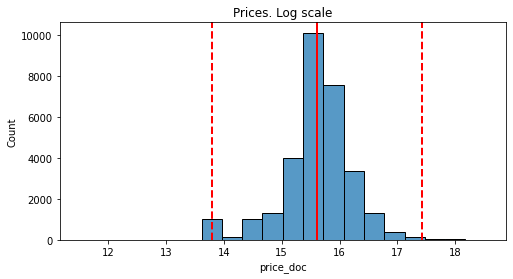

In [65]:
'''     Ручной поиск и здравый смысл       '''

sber_data['life_sq'].describe()   # кол-во значений, среднее, мин мах, квантили 

#print(sber_data[sber_data['life_sq'] == 0].shape[0])  # квартиры с нулевой жилой площадью. возможно апарты

outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]  # количество квартир, где жилая площадь больше общей
#print(outliers.shape[0])

cleaned = sber_data.drop(outliers.index, axis=0)
# print(f'Результирующее число записей: {cleaned.shape[0]}')  # Результирующее число записей: 30434




'''     Метод Тьюки  (межквартильного размаха)   '''

#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 4))
#histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
#histplot.set_title('Full Square Distribution');
#boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
#boxplot.set_title('Full Square Boxplot');

def outliers_iqr(data, feature):           # функция, вычисляющая квантили и значения, лежащие за пределами максимальных границ коробчатой диаграммы(выбросы)
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5)
    upper_bound = quartile_3 + (iqr*1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

#outliers, cleaned = outliers_iqr(sber_data, 'full_sq')
#print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
#print(f'Результирующее число записей: {cleaned.shape[0]}')


# график очищенного датасета
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
#histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
#histplot.set_title('Cleaned Full Square Distribution');
#boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
#boxplot.set_title('Cleaned Full Square Boxplot');


'''     Метод Z-отклонений(3х сигм)     '''
''' Правило трёх сигм гласит: если распределение данных является нормальным, то 99,73 % лежат в интервале (m-3q,m+3q), 
    где m(мю) — математическое ожидание (для выборки это среднее значение), а q(сигма) — стандартное отклонение. 
    Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.'''
    
    
#fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
#histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
#histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
#log_mkad_km= np.log(sber_data['mkad_km'] + 1)           # логарифмирование
#histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
#histplot.set_title('Log MKAD Km Distribution');

#print(log_mkad_km.skew()) # Численный показатель ассиметрии. Если >0, то распределение имеет правосторонню ассиметрию(мат.ожидание(среднее) нормального распределения находится правее моды), если <0 - левосторонней

def outliers_z_score(data, feature, log_scale=True):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()           #   среднее
    sigma = x.std()         #   стандартное отклонение
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
#print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
#print(f'Результирующее число записей: {cleaned.shape[0]}')
#print(outliers['sub_area'].unique())

#fig, ax = plt.subplots(1, 1, figsize=(8, 4))
#log_mkad_km = np.log(sber_data['mkad_km'] + 1)
#histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
#histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
#histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
#histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
#histplot.set_title('Log MKAD Km Distribution with sigma-borders');


fig, aks=plt.subplots(1,1, figsize=(8, 4))
log_price=np.log(sber_data['price_doc'] + 1)
histogr=sns.histplot(log_price, bins=20, ax=aks)
histogr.axvline(log_price.mean(), color='r', lw=2)
histogr.axvline(log_price.mean() - 3*log_price.std(), color='r', ls='--', lw=2)
histogr.axvline(log_price.mean() + 3*log_price.std(), color='r', ls='--', lw=2)
histogr.set_title('Prices. Log scale');

outliers_pr, cleaned_pr = outliers_z_score(sber_data, 'price_doc', log_scale=True)
print(outliers_pr.shape[0])



def outliers_iqr_mod(data, feature, left=3, right=3, log_scale=True):
    if log_scale:
        x=np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*left)
    upper_bound = quartile_3 + (iqr*right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outs, cleard = outliers_iqr_mod(sber_data, 'price_doc')
print(outs.shape[0])


In [72]:
'''     Поиск дубликатов    '''

dupl_columns = list(sber_data.columns)  # получаем список столбцов 
dupl_columns.remove('id')               # удаляем id

mask = sber_data.duplicated(subset=dupl_columns)    # метод duplicated() возвращает булеву маску для фильтрации. Совпадение == True. subset - список признаков, по которым производится поиск дубликатов.
sber_duplicates = sber_data[mask]                   # по умолчанию duplicated() ищет полные дубликаты
#print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

sber_dedupped = sber_data.drop_duplicates(subset=dupl_columns)  # дропаем полные дубликаты
#print(f'Результирующее число записей: {sber_dedupped.shape[0]}')


'''     Поиск не информативных признаков    '''
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in sber_data.columns:
    #наибольшая относительная частота в признаке
    top_freq = sber_data[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = sber_data[col].nunique() / sber_data[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
information_sber_data = sber_data.drop(low_information_cols, axis=1)        # дропаем неинформативные признаки
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений
Результирующее число признаков: 55


In [209]:
'''     Practice    '''

diabetes = pd.read_csv('data/diabetes_data.csv')
#diabetes.info()

#8.1 поиск дубликатов
diabdf_dupl = list(diabetes.columns)
#dupl_mask = diabetes.duplicated(subset=diabdf_dupl)
diabetes_uniq = diabetes.drop_duplicates(subset=diabdf_dupl)


#8.2 поиск неинформативных признаков
non_info_col = []

for col in diabetes_uniq.columns:
    top_freq = diabetes_uniq[col].value_counts(normalize=True).max()
    uniq_ratio = diabetes_uniq[col].nunique()/diabetes_uniq[col].count()
    if top_freq > 0.95:
        non_info_col.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    if uniq_ratio > 0.95:
        non_info_col.append(col)
        print(f'{col}: {round(uniq_ratio*100, 2)}% уникальных значений')
diabet=diabetes_uniq.drop(non_info_col, axis=1)



#8.3 поиск и замена пропусков
mask = diabet.values==0
diabet[mask]=np.nan
vals={
    'Outcome':0,
    'Pregnancies':0,
    'DiabetesPedigreeFunction':0,
    'Age':0
}
diabet= diabet.fillna(vals)

col_null=(diabet.isnull().mean()).round(3)

#8.4 удаление признаков с большой долей пропусков
drop_mask=[]
for col in diabet.columns:
    if col_null[col] > 0.3:
        drop_mask.append(col)
diabet=diabet.drop(drop_mask, axis=1)

#8.5 удаление строк с 2< пропусками
thresh=diabet.shape[1]-2
diabet=diabet.dropna(how='any', thresh=thresh, axis=0)

#8.6  заполнение пропусков медианой
rest_vals={
    'Glucose': diabet['Glucose'].median(),
    'BloodPressure': diabet['BloodPressure'].median(),
    'SkinThickness': diabet['SkinThickness'].median(),
    'BMI': diabet['BMI'].median()
}
diabet=diabet.fillna(rest_vals)
diabet['SkinThickness'].mean()

#8.7    поиск выбросов с пом. межквартильного размаха
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x=np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*left)
    upper_bound = quartile_3 + (iqr*right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned
outs, norms = outliers_iqr_mod(diabet, 'SkinThickness')
#print(outs.shape[0])

#8.8  поиск выбросов с помощью z-отклонения
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()           
    sigma = x.std()         
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outs_z, norms_z = outliers_z_score(diabet, 'SkinThickness')
#print(outs_z.shape[0])

#8.9 разница в поиске выбросов логарифмированного признака и "чистого"

outs_clear, norms_clear = outliers_iqr_mod(diabet, 'DiabetesPedigreeFunction')
print(outs_clear.shape[0])
outs_log, norms_log = outliers_iqr_mod(diabet, 'DiabetesPedigreeFunction', log_scale=True)
print(outs_log.shape[0])

Gender: 100.0% одинаковых значений
29
0
